In [204]:
# Needed packages

import re
import matplotlib.pyplot as plt

import numpy as np

In [205]:
# Opening textfile 
with open('output.txt', 'r') as myfile:
  data = myfile.read()

In [206]:
run_text_pattern = re.compile(r'XRUN[^X]*')
run_text_matches = run_text_pattern.finditer(data)

fitness_arrays = []
CR_arrays = []
F_arrays = []

for run in run_text_matches:
    s_run = run.start()
    e_run = run.end()
    run_line = data[s_run:e_run]
    
    # Go by line
    iterations = []
    fitness = []
    CR = []
    F = []
    line_pattern = re.compile(r'eval[^\n]*')
    line_matches = line_pattern.finditer(run_line)
    
    for line in line_matches:
        s_line = line.start()
        e_line = line.end()
        current_line_split = run_line[s_line: e_line].replace("eval: ","").split(", ")
        iterations.append(float(current_line_split[0]));
        F.append(float(current_line_split[1]));
        CR.append(float(current_line_split[2]));
        fitness.append(float(current_line_split[3]));

    fitness_arrays.append(fitness)
    CR_arrays.append(CR)
    F_arrays.append(F)


In [207]:
nr_values = len(fitness_arrays[0])
mean_array = []
std_array = []

for i in range(nr_values):
    array_at_iteration = []
    for fitness_array in fitness_arrays:
        array_at_iteration.append(fitness_array[i])
    
    mean_array.append(np.mean(array_at_iteration))
    std_array.append(np.std(array_at_iteration))
    
mean_array = np.array(mean_array)
std_array = np.array(std_array)
fitness_arrays = np.array(fitness_arrays)
iterations = np.array(iterations)

In [208]:
def plotWithStd(array_of_arrays, iterations):
    nr_values = len(array_of_arrays[0])
    mean_array = []
    std_array = []

    for i in range(nr_values):
        array_at_iteration = []
        for array in array_of_arrays:
            array_at_iteration.append(array[i])
    
        mean_array.append(np.mean(array_at_iteration))
        std_array.append(np.std(array_at_iteration))
    
    mean_array = np.array(mean_array)
    std_array = np.array(std_array)
    iterations = np.array(iterations)
    
    plt.plot(iterations, mean_array + std_array, "r")
    plt.plot(iterations, mean_array , "b")
    plt.plot(iterations, mean_array - std_array, "r")

    plt.show()
    
    


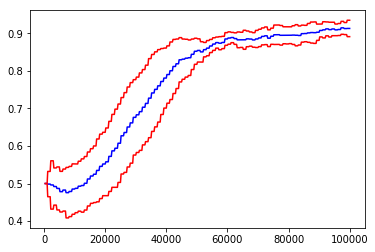

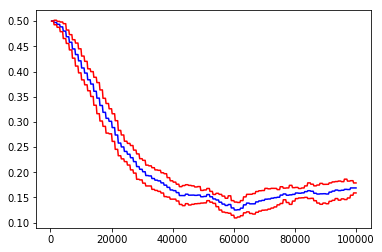

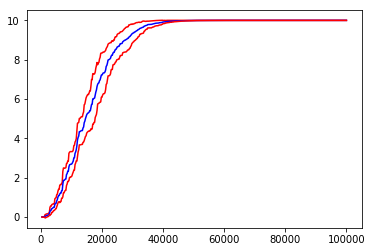

In [202]:
plotWithStd(CR_arrays, iterations)
plotWithStd(F_arrays, iterations)
plotWithStd(fitness_arrays, iterations)




In [203]:
print("Mean: %.20f" % mean_array[nr_values-1])
print("Std: %.20f" % std_array[nr_values-1])

Mean: 9.99987782238296318837
Std: 0.00021766115652684258


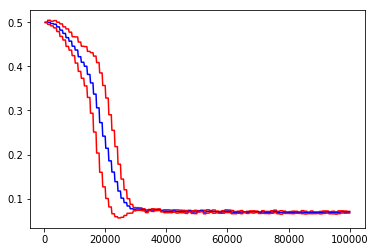

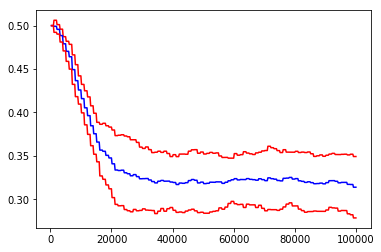

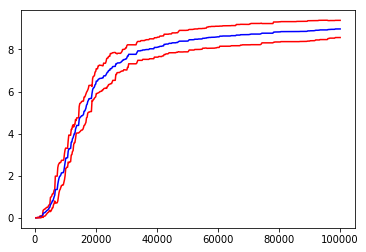

In [209]:
plotWithStd(CR_arrays, iterations)
plotWithStd(F_arrays, iterations)
plotWithStd(fitness_arrays, iterations)


In [210]:
print("Mean: %.20f" % mean_array[nr_values-1])
print("Std: %.20f" % std_array[nr_values-1])

Mean: 8.97428957171671903836
Std: 0.40791378122669180728


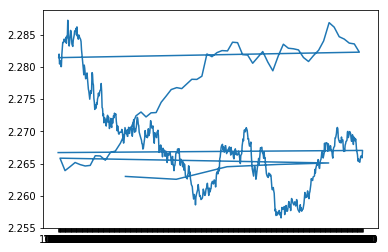

In [34]:
mean_array = np.array(mean_array)
distance_log_array = np.log(10-mean_array)
plt.plot(iterations, distance_log_array)
plt.show()